# Covid 19

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
data = pd.read_excel('dataset.xlsx')
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

## Analyse de la forme
* Variable target : SARS-Cov-2 exam result
* Ligne colonne : 5644 x 111
* type : float64 70, int64 4, object 37 -> quantitative 41, qualitative 70
* Analyse valeur manquantes

<AxesSubplot:ylabel='None'>

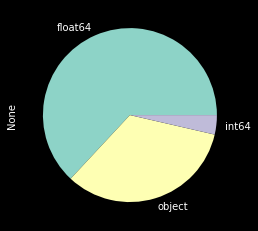

In [22]:
# on commence par faire une copie
df = data.copy()
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

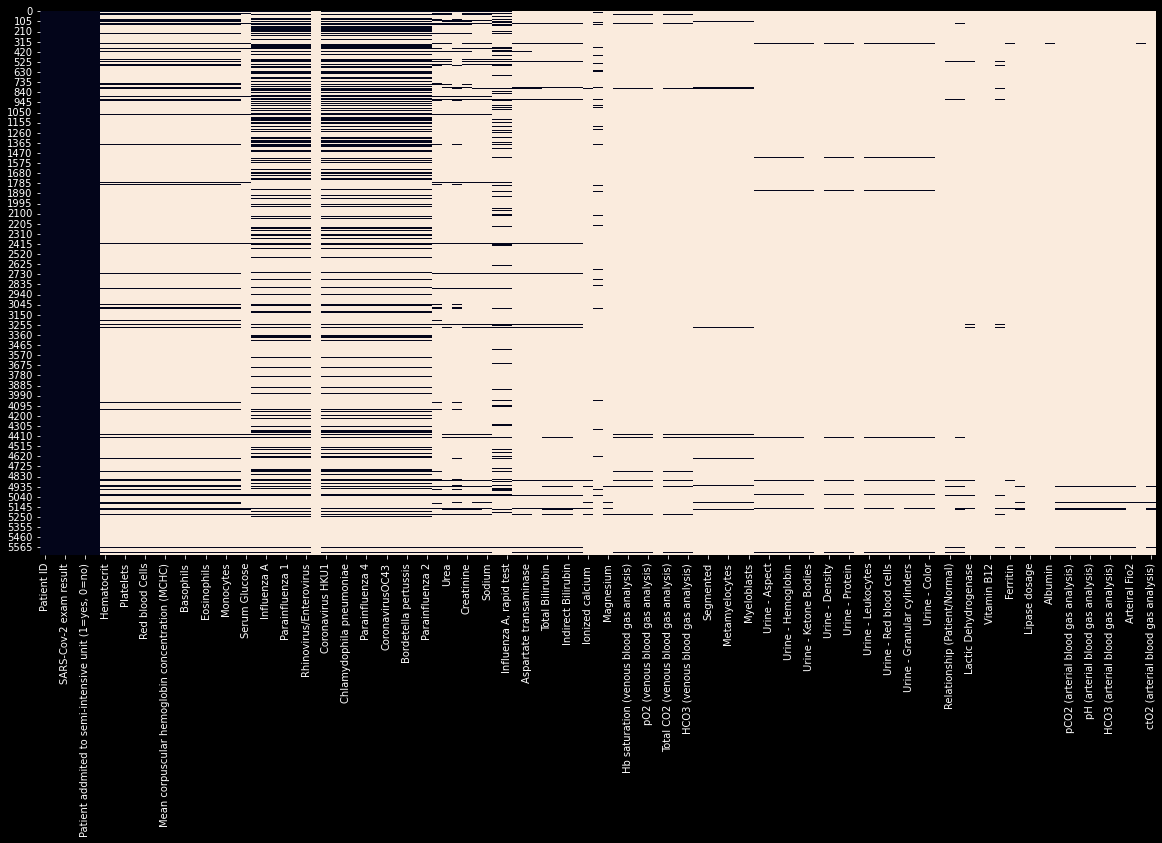

In [26]:
plt.figure(figsize= (20,10))
sns.heatmap(df.isna(),cbar=False)

In [29]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## On commence par nettoyer les données
avec les cellules qui ont plus de 90% de valeurs manquantes

<AxesSubplot:>

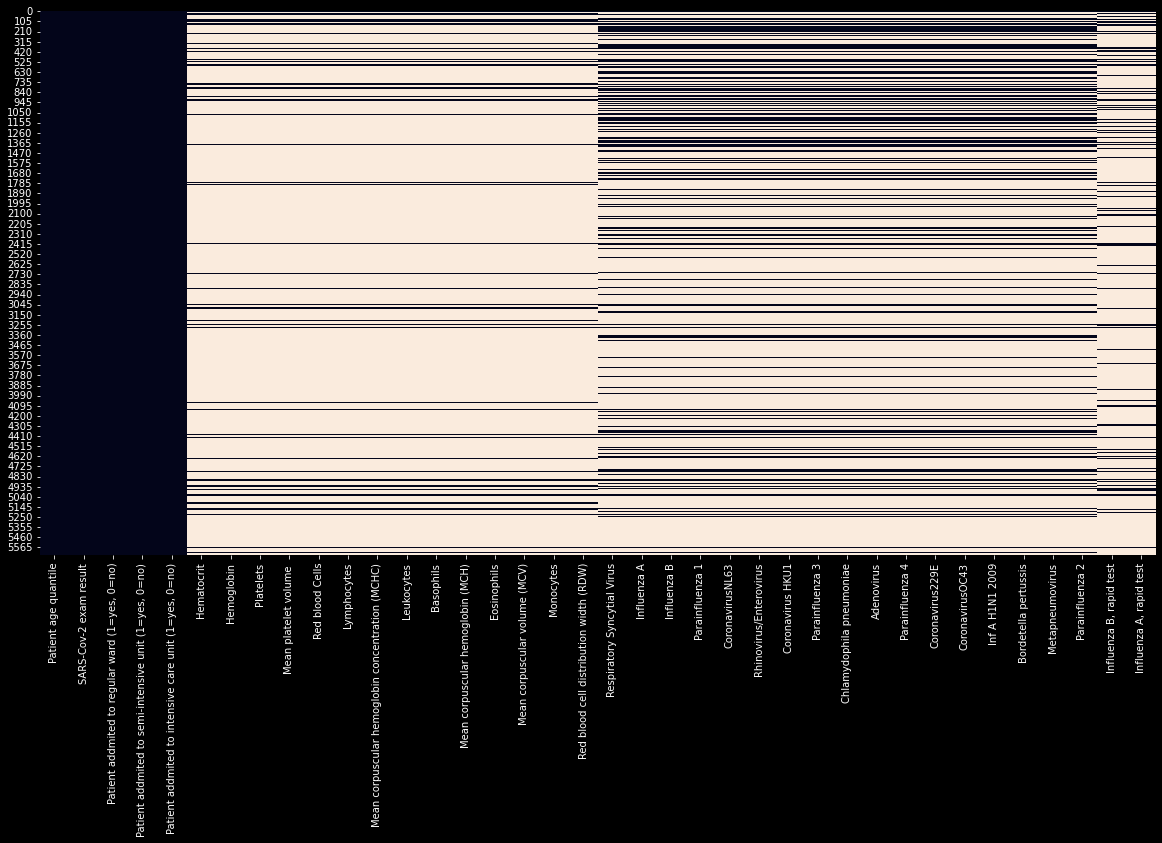

In [36]:
# on supprime les colonnes avec trop de données manquantes
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
# on supprime la colonne du Patient ID
df = df.drop('Patient ID',axis=1)
plt.figure(figsize= (20,10))
sns.heatmap(df.isna(),cbar=False)

## Analyse de fond
* Visualisation de la target : environ 10% de cas positif
* Analyse des histogrammes des variables float64 ( valeur centrées en 0 et écart-type =1 )


In [41]:
df['SARS-Cov-2 exam result'].value_counts().plot.pie()

<AxesSubplot:ylabel='SARS-Cov-2 exam result'>

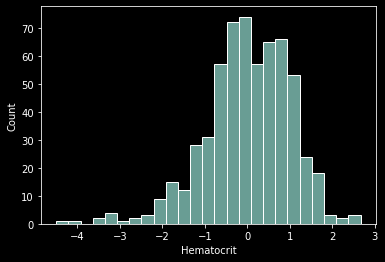

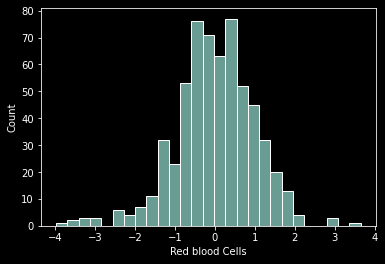

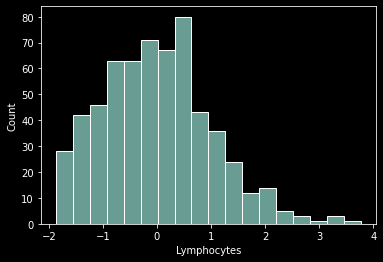

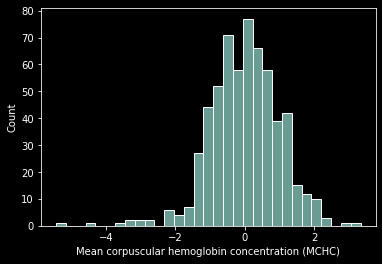

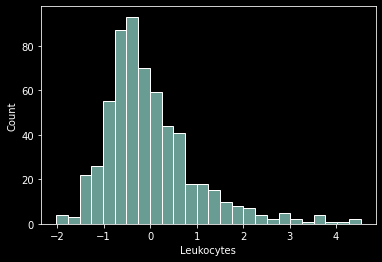

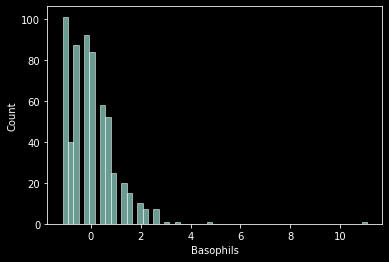

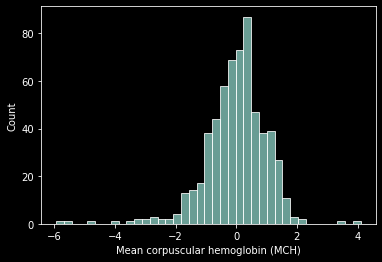

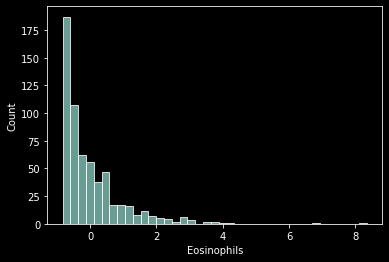

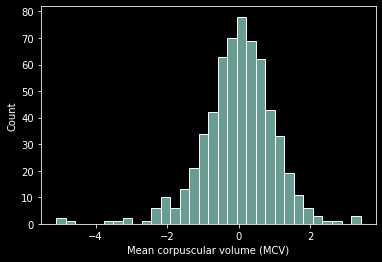

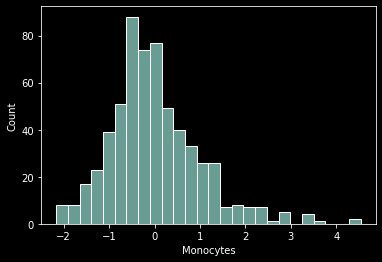

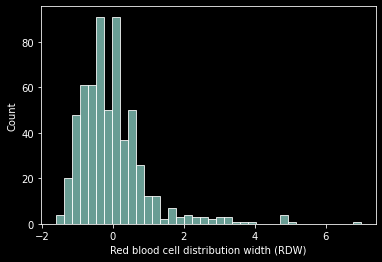

In [52]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col])

/Users/rky/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

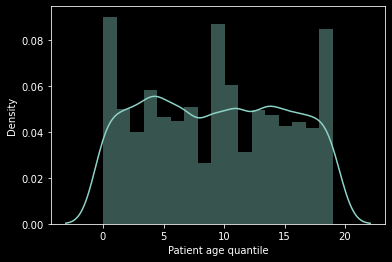

In [53]:
sns.distplot(df['Patient age quantile'])

In [55]:
# variables qualitatives
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

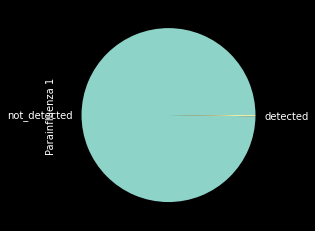

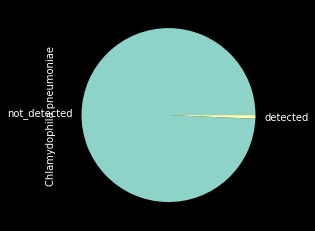

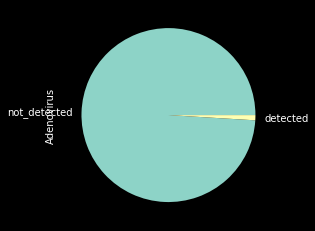

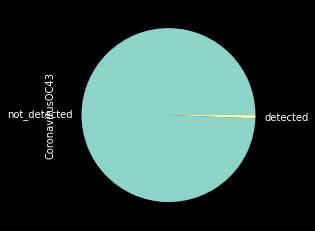

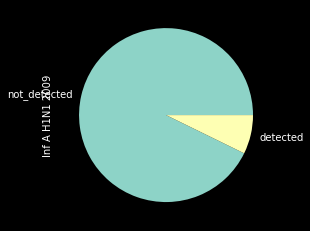

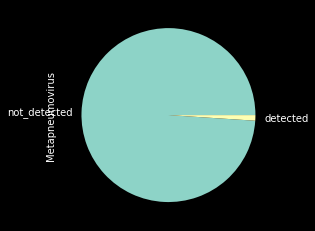

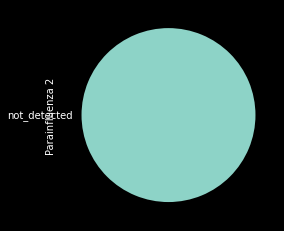

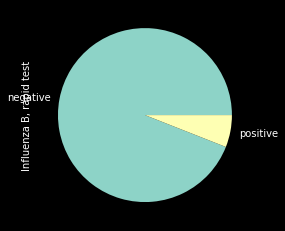

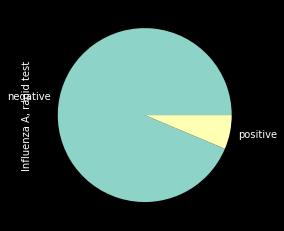

In [57]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

# Relation Variable <> Target

### création des sous ensemble negative/positive

In [70]:
positif = df[df['SARS-Cov-2 exam result'] == 'positive']
negatif = df[df['SARS-Cov-2 exam result'] == 'negative']

### creation des blocs BLOOD et VIRAL

In [66]:
missing_rate = df.isna().sum()/df.shape[0] 
blood = df.columns[(missing_rate<0.9)&(missing_rate>0.88)]
viral = df.columns[(missing_rate<0.88)&(missing_rate>0.75)] 

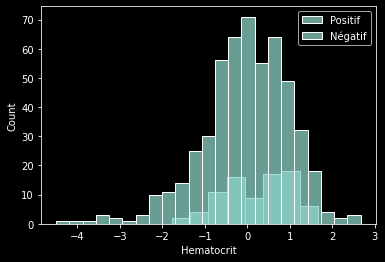

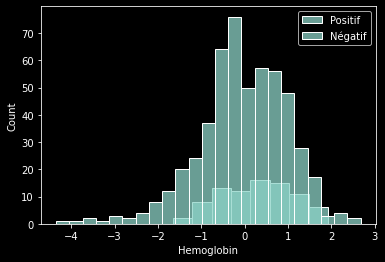

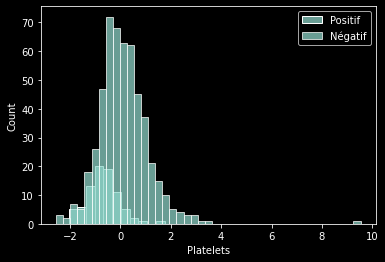

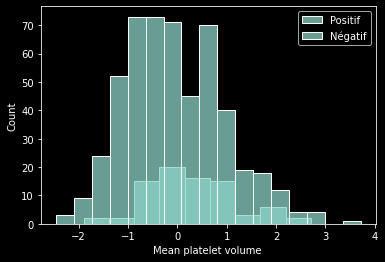

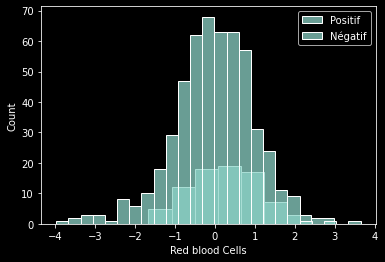

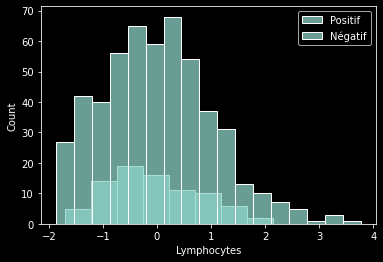

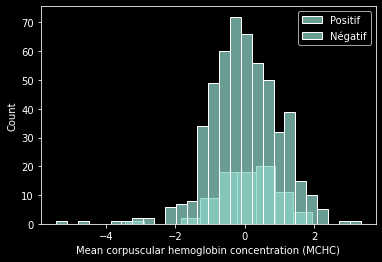

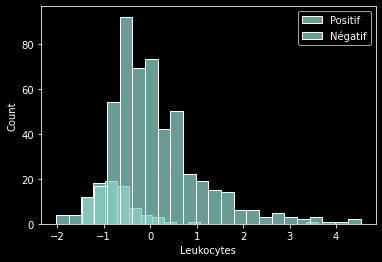

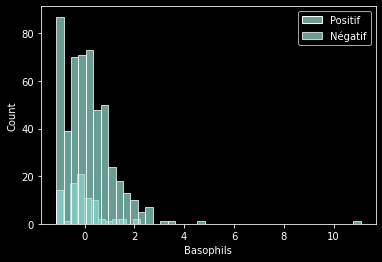

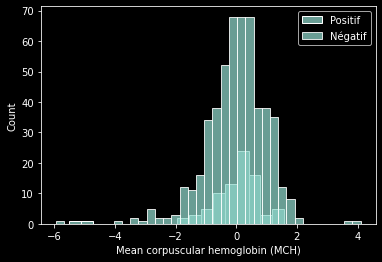

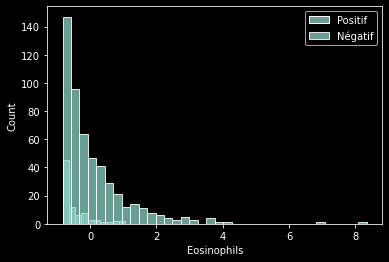

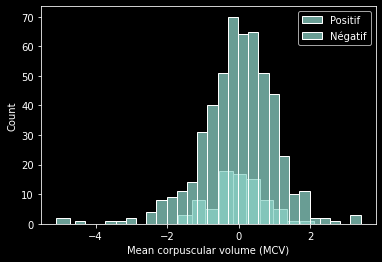

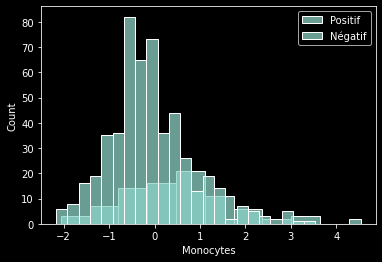

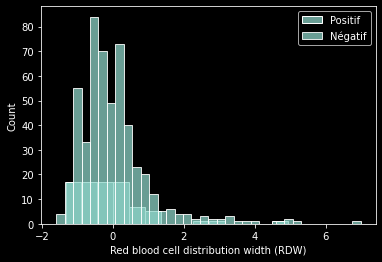

In [69]:
for col in blood:
    plt.figure()
    sns.histplot(positif[col],label='Positif')
    sns.histplot(negatif[col],label='Négatif')
    plt.legend()

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

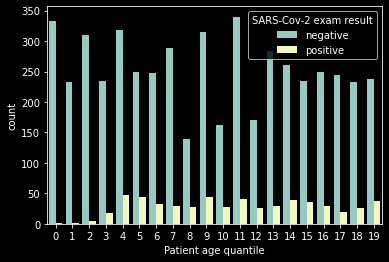

In [71]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result',data=df)

In [75]:
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

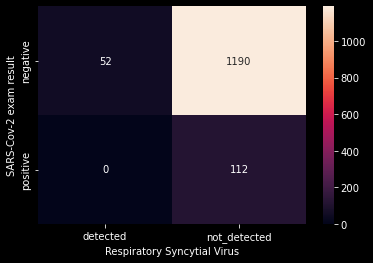

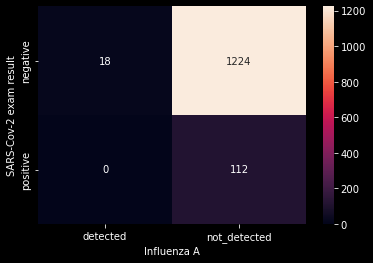

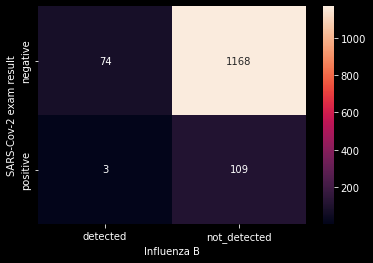

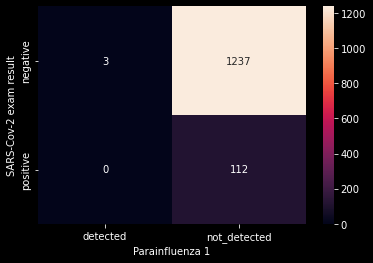

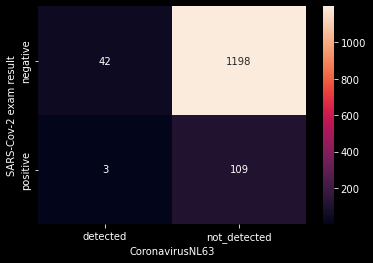

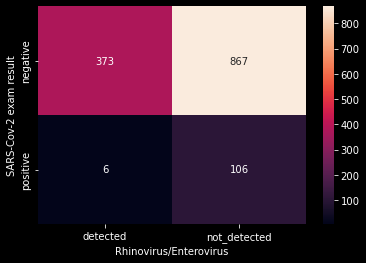

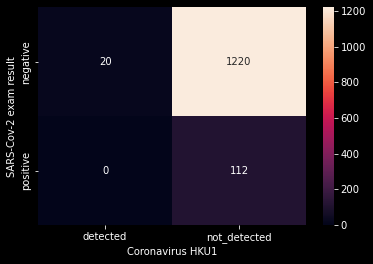

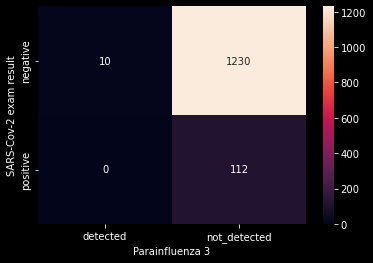

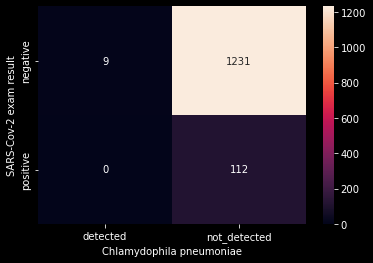

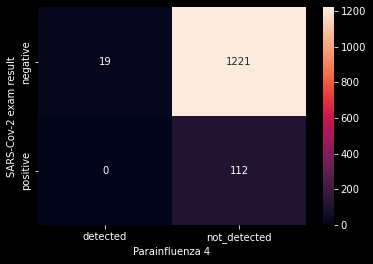

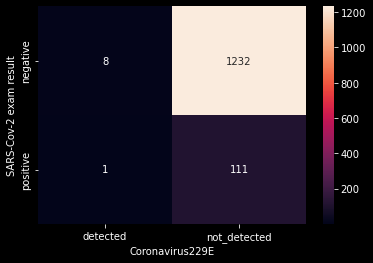

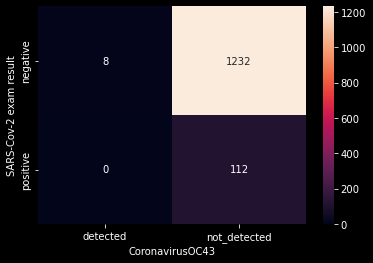

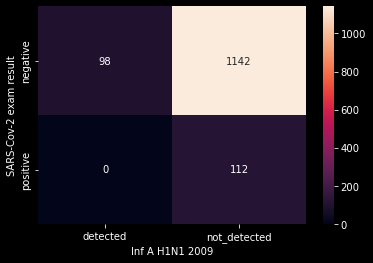

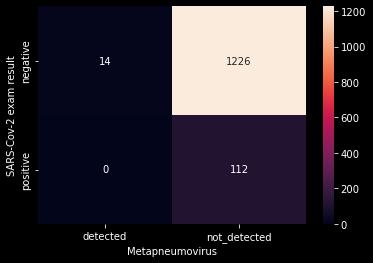

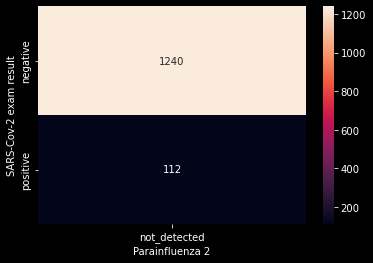

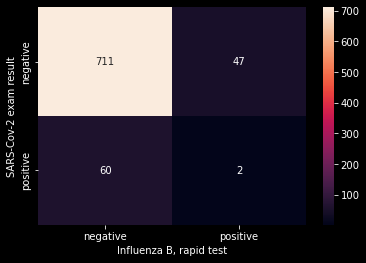

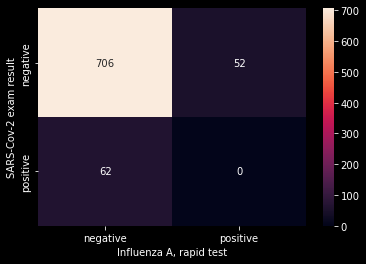

In [76]:
for col in viral:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')

## Analyse plus détaillée
relations variable/variable
relations taux sanguin

In [77]:
sns.pairplot(df[blood])

In [78]:
sns.heatmap(df[blood].corr())

<AxesSubplot:>

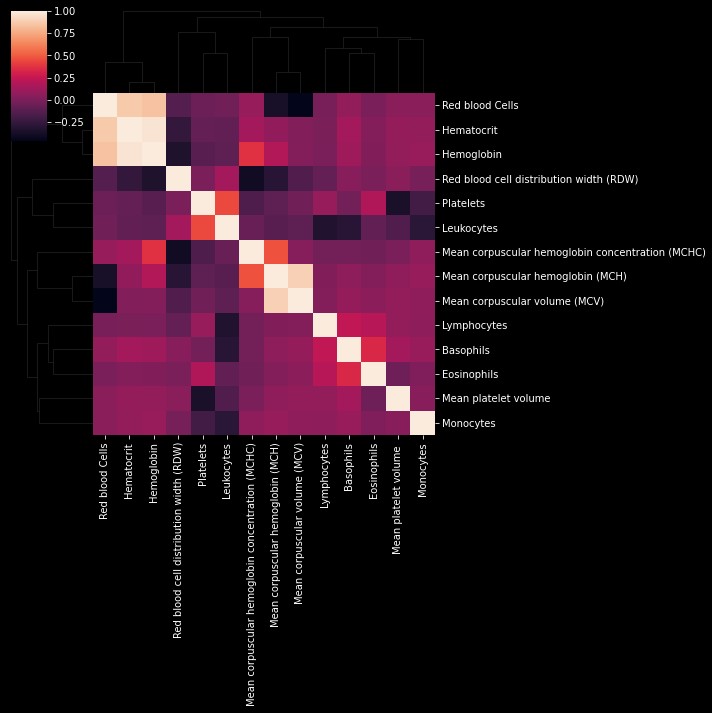

In [79]:
sns.clustermap(df[blood].corr())

## Relation Age / Sang

/var/folders/vw/2g_98rts7tzczmvh5hqt_qn00000gn/T/ipykernel_55894/762738093.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

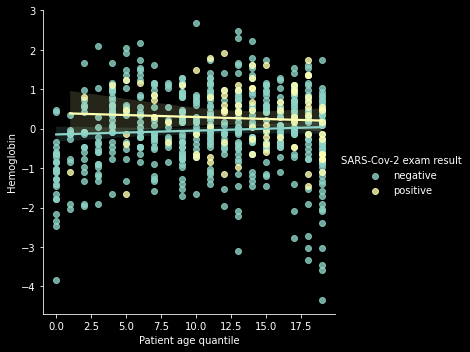

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

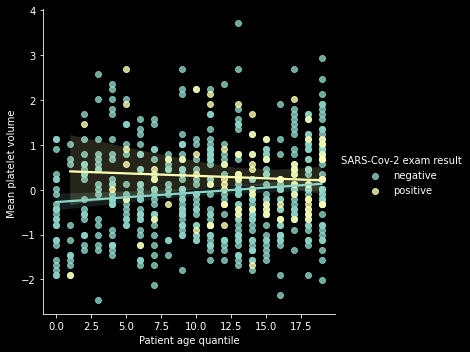

<Figure size 432x288 with 0 Axes>

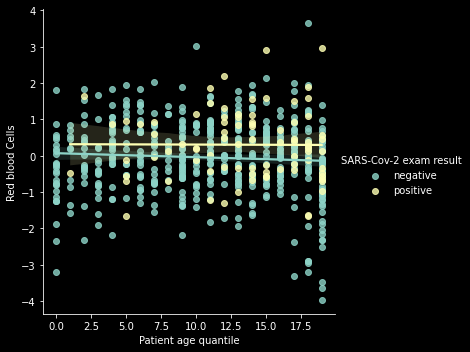

<Figure size 432x288 with 0 Axes>

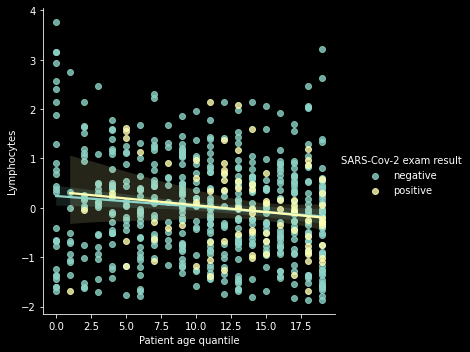

<Figure size 432x288 with 0 Axes>

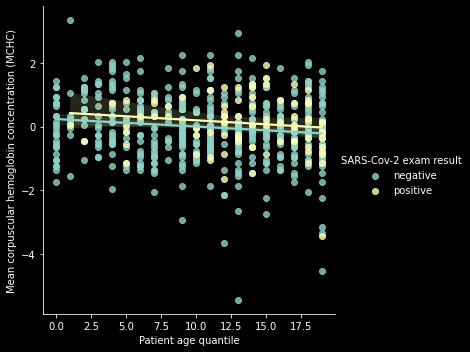

<Figure size 432x288 with 0 Axes>

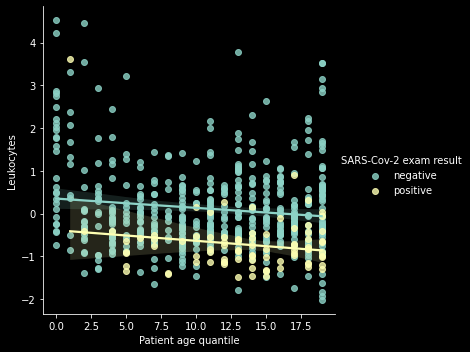

<Figure size 432x288 with 0 Axes>

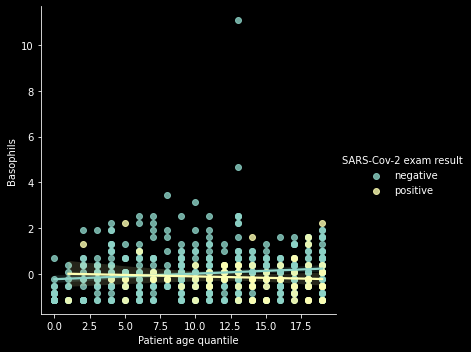

<Figure size 432x288 with 0 Axes>

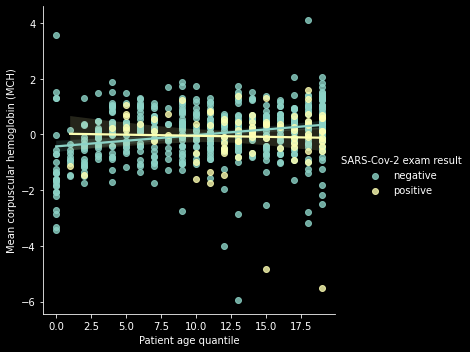

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

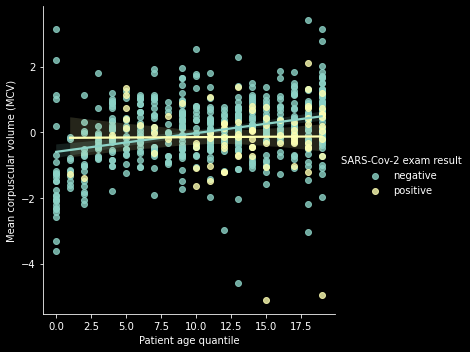

<Figure size 432x288 with 0 Axes>

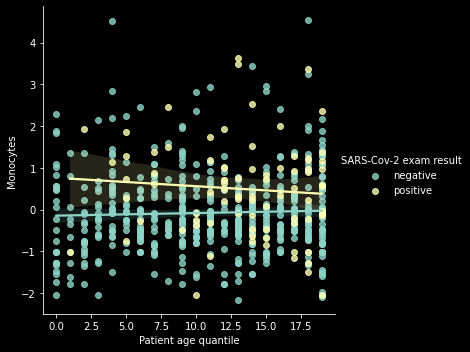

<Figure size 432x288 with 0 Axes>

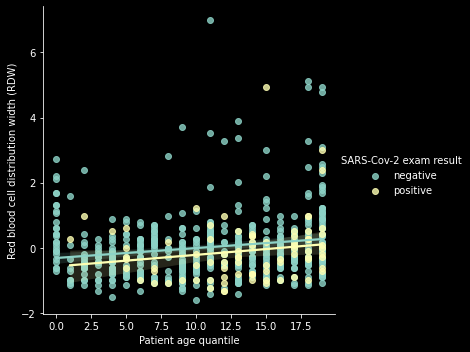

In [82]:
for col in blood:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df)

## Crétaion d'une nouvelle variable 'est malade'

<AxesSubplot:>

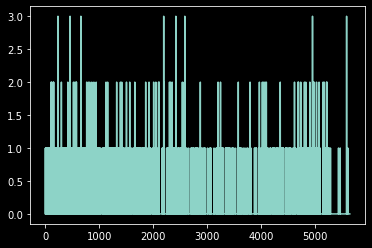

In [87]:
df['est malade'] = np.sum(df[viral[:-2]] == 'detected',axis=1)>= 1 # on crréé la colonne est malade
np.sum(df[viral[:-2]] == 'detected',axis=1).plot()

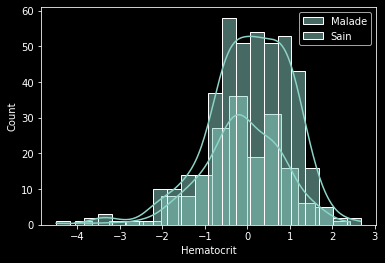

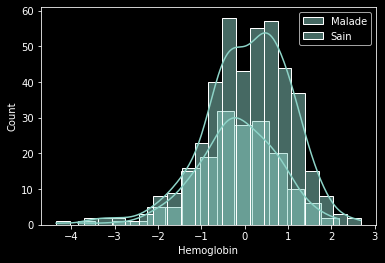

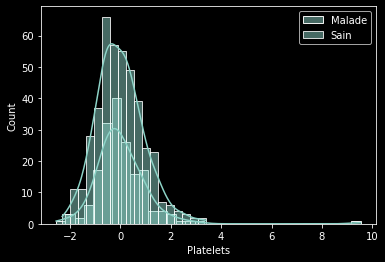

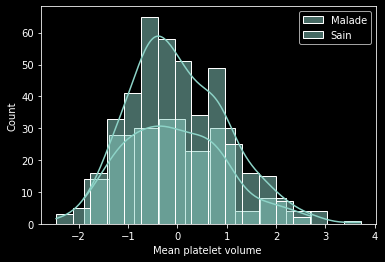

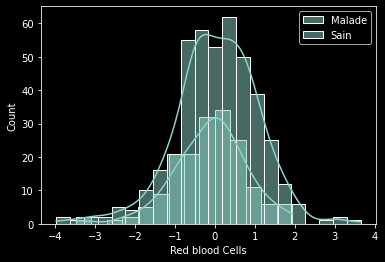

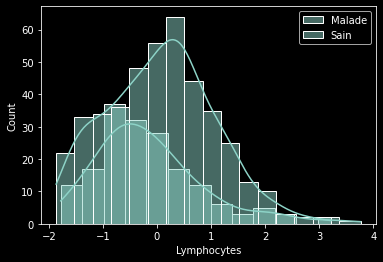

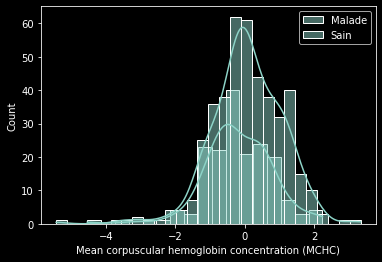

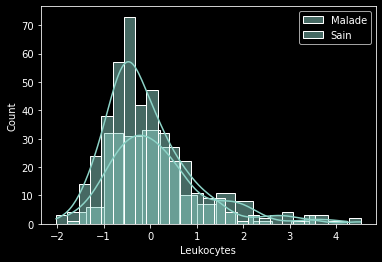

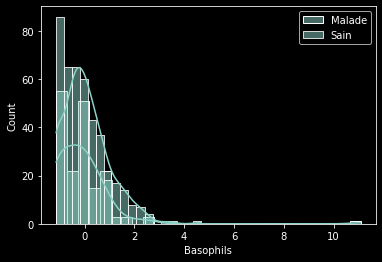

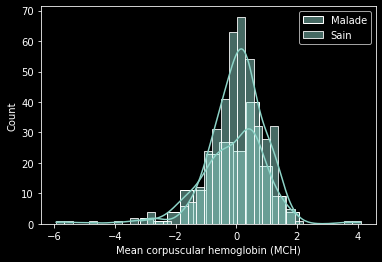

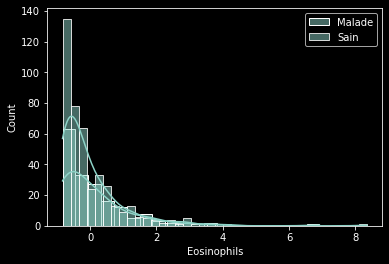

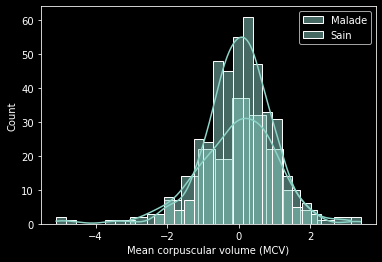

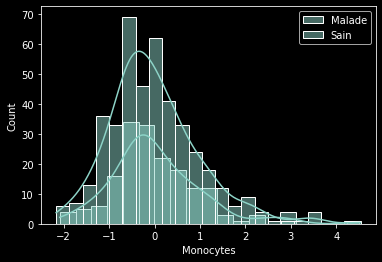

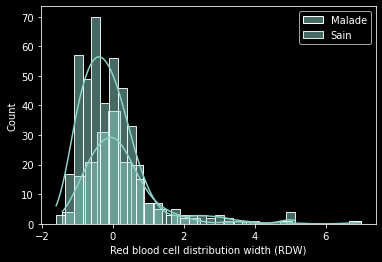

In [97]:
malade_oui = df[df['est malade'] == True]
malade_non = df[df['est malade'] == False]

for col in blood:
    plt.figure()
    sns.histplot(malade_oui[col],label='Malade',kde=True,common_norm=True)
    sns.histplot(malade_non[col],label='Sain',kde=True,common_norm=True)
    plt.legend()

## Relation entre hospitalisation et malade 

In [98]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    if df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensif'
    if df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensif'
    else:
        return 'inconnu'

In [101]:
df['status'] = df.apply(hospitalisation,axis=1)

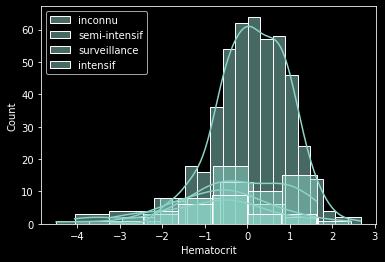

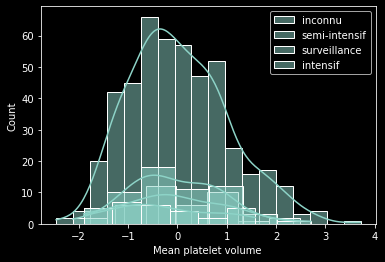

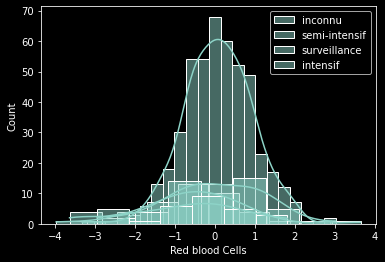

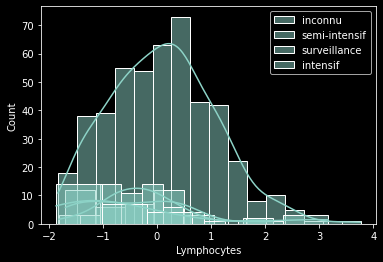

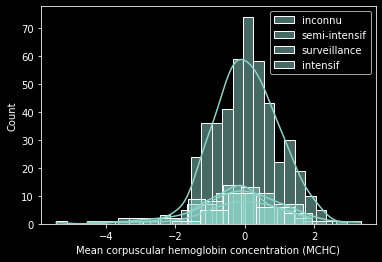

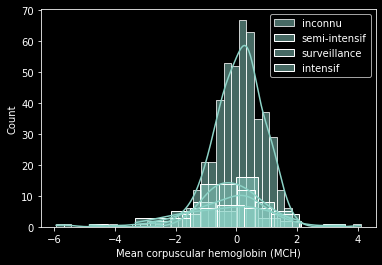

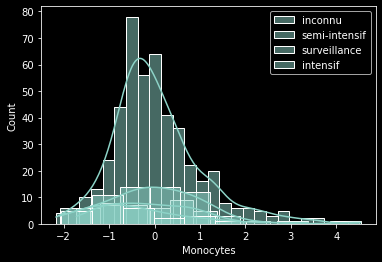

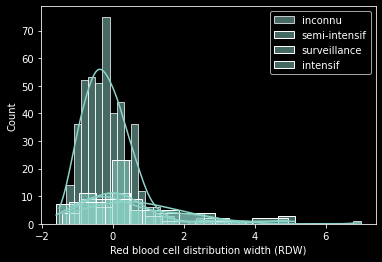

In [103]:
for col in blood:
    plt.figure()
    for cat in df['status'].unique():
        sns.histplot(df[df['status']==cat][col], label=cat, kde=True)
    plt.legend()

## T-Test

on fait un test pour savoir si on garde ou rejette une hypothèse

In [104]:
from scipy.stats import ttest_ind
positif.shape

(558, 38)

In [116]:
bal_negatif = negatif.sample(positif.shape[0])

In [117]:
def t_test(col):
    alpha=0.02
    stat, p = ttest_ind(bal_negatif[col].dropna(),positif[col].dropna())
    if p<alpha:
        return 'H0 rejete'
    else:
        return 0

In [118]:
for col in blood:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejete
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejete
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejete
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejete
Red blood cell distribution width (RDW)----------- 0
